In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=2007063f0a8e89b4304a05ae7ad773f15ef2d21d77dbc295caf95fb9ad4b2196
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
Gen RAM Free: 12.1 GB  | Proc size: 211.5 MB
GPU RAM Free: 15101MB | Used: 0MB | Util   0% | Total 15360MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c llm-detect-ai-generated-text

 72% 1.00M/1.38M [00:00<00:00, 3.85MB/s]
100% 1.38M/1.38M [00:00<00:00, 4.70MB/s]


In [ ]:
from zipfile import ZipFile as ZipFileObj
file_name = "llm-detect-ai-generated-text.zip"
with ZipFileObj(file_name, "r") as zip_obj:
    zip_obj.extractall("/content/drive/MyDrive/Colab Notebooks")
    print("done")

done


In [ ]:
import pandas as pd
import textwrap

file_path = "/content/drive/MyDrive/Colab Notebooks/train_essays.csv"
df1 = pd.read_csv(file_path)

real_df = df1[df1['generated'] == 0]
fake_df = df1[df1['generated'] == 1]
prompt0_df = df1[df1["prompt_id"] == 0]
prompt1_df = df1[df1["prompt_id"] == 1]

pd.set_option('display.max_colwidth', None)

print("prompt0:", len(prompt0_df), "prompt1:", len(prompt1_df))
print("total:", len(df1))

del df1["id"]
del df1["prompt_id"]

print('number of unique datas in text column :',df1['text'].nunique())
print(df1.groupby('generated').size().reset_index(name='count'))

prompt0: 708 prompt1: 670
total: 1378
number of unique datas in text column : 1378
   generated  count
0          0   1375
1          1      3


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/train_v2_drcat_02.csv"
df2 = pd.read_csv(file_path, sep=',', header=0)
print(df2.groupby('label').size().reset_index(name='count'))
print(len(df2))

del df2["prompt_name"]
del df2["source"]
del df2["RDizzl3_seven"]
df2 = df2.rename(columns={'label': 'generated'})
df_final = pd.concat([df1, df2], axis=0)
print(len(df_final))
print(df_final.groupby('generated').size().reset_index(name='count'))

x_data = df_final['text']
y_data = df_final['generated']
print('number of essays: {}'.format(len(x_data)))
print('number of labels: {}'.format(len(y_data)))

   label  count
0      0  27371
1      1  17497
44868
46246
   generated  count
0          0  28746
1          1  17500
number of essays: 46246
number of labels: 46246


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

print('--------train dataset-----------')
print(f'human essays = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'ai generated essays = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

print('--------test dataset-----------')
print(f'human essays = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'ai generated essays = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------train dataset-----------
human essays = 62.158%
ai generated essays = 37.842%
--------test dataset-----------
human essays = 62.162%
ai generated essays = 37.838%


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train_encoded = tokenizer.texts_to_sequences(x_train)
print(x_train_encoded[:5])

word_to_index = tokenizer.word_index
print(word_to_index)

[[1, 85, 5, 1, 372, 467, 643, 117, 749, 2, 505, 4, 726, 740, 750, 6, 4, 279, 27, 11, 147, 424, 9, 27, 358, 4, 677, 2, 11, 4637, 2, 87, 770, 4, 71, 9, 27, 41, 46, 2, 219, 1, 71, 42, 697, 54, 826, 2, 1, 393, 5, 484, 76, 345, 99, 224, 16, 24069, 141, 42, 1417, 3, 1665, 2, 14580, 23, 11577, 1, 117, 49, 11, 2259, 2, 1, 1224, 9, 417, 11, 104, 2, 456, 29348, 33, 1318, 24, 1, 40214, 5, 134, 1, 11577, 3, 14580, 27, 11, 104, 2, 1176, 1, 313, 1, 397, 78, 7, 50, 119, 24070, 417, 11, 104, 2, 1176, 1, 1455, 4691, 33, 2143, 55, 118, 13, 49, 21, 313, 27, 11, 343, 2, 124, 54, 7, 13, 14, 138, 75, 22, 19, 15, 443, 44, 161, 534, 28, 453, 8583, 5, 1, 148, 15, 212, 22, 29349, 459, 1097, 82, 707, 52, 11578, 106, 1, 135, 995, 7, 13, 48, 1741, 26, 534, 38, 7, 55, 28, 1, 486, 148, 8, 783, 2, 1444, 24, 4, 1393, 255, 106, 1, 135, 995, 20, 2, 1741, 2, 67, 111, 38, 7, 18, 29350, 1393, 24, 1, 124, 818, 75, 1, 19, 15, 443, 9, 32, 46, 219, 1, 19, 15372, 6, 61, 13, 15, 161, 1, 124, 32, 91, 75, 22, 19, 15, 443, 60, 61, 

In [ ]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('number of rare words with frequency lower than %s: %s'%(threshold - 1, rare_cnt))
print("proportion of rare words in vocabulary:", (rare_cnt / total_cnt)*100)
print("proportion of rare word occurrences in the total frequency of word appearances:", (rare_freq / total_freq)*100)

number of rare words with frequency lower than 1: 42040
proportion of rare words in vocabulary: 51.11059778974627
proportion of rare word occurrences in the total frequency of word appearances: 0.2905594645080301


In [ ]:
vocab_size = len(word_to_index) + 1
print('vocab size: {}'.format((vocab_size)))

vocab size: 82254


max length of essay: 4714
avg length of essay: 391.086577


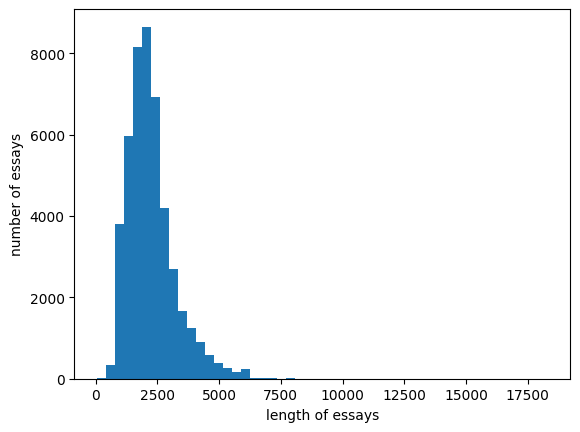

In [ ]:
import matplotlib.pyplot as plt

print('max length of essay: %d' % max(len(essay) for essay in x_train_encoded))
print('avg length of essay: %f' % (sum(map(len, x_train_encoded))/len(x_train_encoded)))
plt.hist([len(essay) for essay in x_data], bins=50)
plt.xlabel('length of essays')
plt.ylabel('number of essays')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 4714
x_train_padded = pad_sequences(x_train_encoded, maxlen = max_len)
print("shape of train data:", x_train_padded.shape)

shape of train data: (36996, 4714)


In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/best_model.h5', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(x_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
463/463 [==============================] - ETA: 0s - loss: 0.3220 - acc: 0.8510
Epoch 1: val_acc improved from -inf to 0.97027, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


463/463 [==============================] - 74s 147ms/step - loss: 0.3220 - acc: 0.8510 - val_loss: 0.0970 - val_acc: 0.9703
Epoch 2/10
463/463 [==============================] - ETA: 0s - loss: 0.0853 - acc: 0.9720
Epoch 2: val_acc improved from 0.97027 to 0.98216, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5
463/463 [==============================] - 38s 82ms/step - loss: 0.0853 - acc: 0.9720 - val_loss: 0.0550 - val_acc: 0.9822
Epoch 3/10
463/463 [==============================] - ETA: 0s - loss: 0.0468 - acc: 0.9852
Epoch 3: val_acc improved from 0.98216 to 0.98554, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5
463/463 [==============================] - 29s 63ms/step - loss: 0.0468 - acc: 0.9852 - val_loss: 0.0452 - val_acc: 0.9855
Epoch 4/10
463/463 [==============================] - ETA: 0s - loss: 0.0301 - acc: 0.9908
Epoch 4: val_acc improved from 0.98554 to 0.98676, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.

In [ ]:
x_test_encoded = tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(x_test_encoded, maxlen = max_len)
print("\n test accuracy: %.4f" % (model.evaluate(x_test_padded, y_test)[1]))

290/290 [==============================] - 1s 4ms/step - loss: 0.0379 - acc: 0.9895

 test accuracy: 0.9895


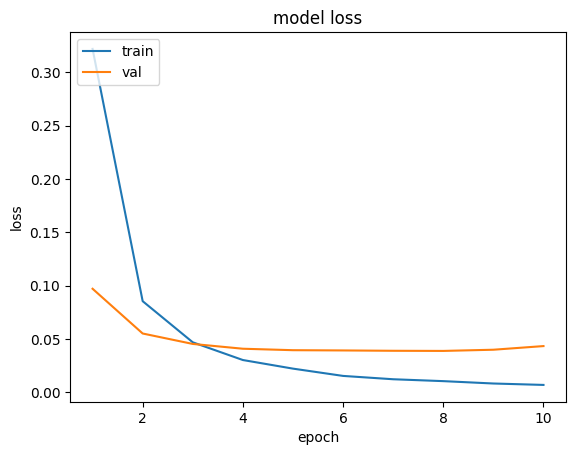

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

file_path = "/content/drive/MyDrive/Colab Notebooks/test_essays.csv"
submit_test_df = pd.read_csv(file_path)

submit_test_encoded = tokenizer.texts_to_sequences(submit_test_df['text'])
submit_test_padded = pad_sequences(submit_test_encoded, maxlen = max_len)

model_path = "/content/drive/MyDrive/Colab Notebooks/best_model.h5"
model = load_model(model_path)

pred = model.predict(submit_test_padded)

submit_test_df['generated'] = pred

del submit_test_df["prompt_id"]
del submit_test_df["text"]

submit_test_df.to_csv("/content/drive/MyDrive/Colab Notebooks/submission.csv", index=False)

submit_test_df

1/1 [==============================] - 0s 87ms/step


,id,generated
0,0000aaaa,0.495053
1,1111bbbb,0.495053
2,2222cccc,0.495053
